# Decision Tree and Random Forest

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('data/zoo.csv')
df.head(5) # 1:true

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
animal_count = df.groupby('animal_name').agg({'animal_name':'count'})
animal_count.rename(columns = {'animal_name':'animal_name_count'}, inplace = True)

df = df.join(animal_count, on='animal_name', how='left')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,animal_name_count
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


In [27]:
df.shape

(101, 18)

In [14]:
def clean_dataset(df):
    df = df.drop(['class_type','animal_name','animal_name_count'], axis=1)
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)
df.shape

(101, 16)

In [26]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [37]:
X = df.drop(['class_type','animal_name'], axis=1).values
y = df['class_type'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=123)

### Decision Tree

C:\Users\Saurabh\anaconda3\envs\test\lib\site-packages\sklearn\multiclass.py:382: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]
C:\Users\Saurabh\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


Confusion matrix: 
 [[19  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0  1  0  0  0  3]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  3]
 [ 0  0  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      0.25      0.40         4
           7       0.45      1.00      0.62         5

    accuracy                           0.88        51
   macro avg       0.92      0.79      0.78        51
weighted avg       0.95      0.88      0.87        51

Decision Tree Accuracy: 0.8823529411764706


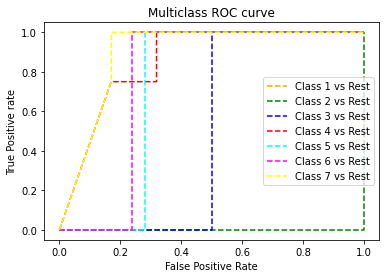

In [44]:
dt = OneVsRestClassifier(DecisionTreeClassifier())
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_prob = dt.predict_proba(X_test)

dt_conf_mat = confusion_matrix(y_test, dt_pred)
print(f"Confusion matrix: \n {dt_conf_mat}")
print(classification_report(y_test, dt_pred))

dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# dt_auc = roc_auc_score(y_test, dt_pred)
# print(f"Decision Tree AUC: {dt_auc}")

dt_fpr = {} 
dt_tpr={}
dt_thresholds={}
n_class = len(df['class_type'].unique())

for i in range(n_class):
    dt_fpr[i], dt_tpr[i], dt_thresholds[i] = roc_curve(y_test, dt_pred, pos_label=i)

# plotting    
plt.plot(dt_fpr[0], dt_tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(dt_fpr[1], dt_tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(dt_fpr[2], dt_tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(dt_fpr[3], dt_tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(dt_fpr[4], dt_tpr[4], linestyle='--',color='cyan', label='Class 5 vs Rest')
plt.plot(dt_fpr[5], dt_tpr[5], linestyle='--',color='magenta', label='Class 6 vs Rest')
plt.plot(dt_fpr[6], dt_tpr[6], linestyle='--',color='yellow', label='Class 7 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300); 
plt.show()

Confusion matrix: 
 [[19  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  1  1  1  1  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  2]
 [ 0  0  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.96        13
           3       1.00      0.25      0.40         4
           4       0.83      1.00      0.91         5
           5       0.50      1.00      0.67         1
           6       1.00      0.50      0.67         4
           7       0.71      1.00      0.83         5

    accuracy                           0.90        51
   macro avg       0.85      0.82      0.78        51
weighted avg       0.93      0.90      0.89        51

Random Forest Accuracy: 0.9019607843137255


C:\Users\Saurabh\anaconda3\envs\test\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


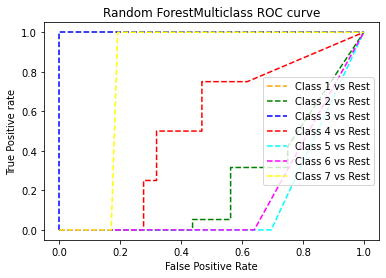

In [43]:
## Random Forest Classifier
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)

rf_conf_mat = confusion_matrix(y_test, rf_pred)
print(f"Confusion matrix: \n {rf_conf_mat}")
print(classification_report(y_test, rf_pred))

rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

# dt_auc = roc_auc_score(y_test, dt_pred)
# print(f"Decision Tree AUC: {dt_auc}")

rf_fpr = {} 
rf_tpr={}
rf_thresholds={}
n_class = len(df['class_type'].unique())

for i in range(n_class):
    rf_fpr[i], rf_tpr[i], rf_thresholds[i] = roc_curve(y_test, rf_pred_prob[:,1], pos_label=i)

# plotting    
plt.plot(rf_fpr[0], rf_tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(rf_fpr[1], rf_tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(rf_fpr[2], rf_tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(rf_fpr[3], rf_tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(rf_fpr[4], rf_tpr[4], linestyle='--',color='cyan', label='Class 5 vs Rest')
plt.plot(rf_fpr[5], rf_tpr[5], linestyle='--',color='magenta', label='Class 6 vs Rest')
plt.plot(dt_fpr[6], dt_tpr[5], linestyle='--',color='yellow', label='Class 7 vs Rest')


plt.title('Random ForestMulticlass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300); 
plt.show()

In [109]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score
from sklearn.preprocessing import LabelBinarizer

In [110]:
class Decision_Tree:
    def __init__(self):
        self.DTC = DecisionTreeClassifier()
    
    def get_params_for_dtc(self, train_x, train_y):
        try:
            self.param_grid_for_dtc={"criterion":['gini','entropy'], 'max_depth':range(1,10),
                                     "min_samples_split": range(1,10), "min_samples_leaf":range(1,5),
                                     "max_features":['auto', 'aqrt','log2']}
#             self.str_kfold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
            self.grid = GridSearchCV(estimator=self.DTC, param_grid=self.param_grid_for_dtc, verbose=0, cv=2)
            self.grid.fit(train_x,train_y)
            
            self.criterions = self.grid.best_params_['criterion']
            self.max_depth = self.grid.best_params_['max_depth']
            self.min_samples_split = self.grid.best_params_['min_samples_split']
            self.min_samples_leaf = self.grid.best_params_['min_samples_leaf']
            self.max_features = self.grid.best_params_['max_features']
            
            self.dtc = DecisionTreeClassifier(criterion=self.criterions, max_depth=self.max_depth, min_samples_split=self.min_samples_split,
                                              min_samples_leaf = self.min_samples_leaf, max_features=self.max_features)
            self.dtc.fit(train_x,train_y)
            print(f'DecisionTreeClassifier best params:{str(self.grid.best_params_)}.')
            return self.dtc
       
        except Exception as e:
            print(f'Exception occured in get_params_for_dtc method. Exception message: {str(e)}')
            print('LogisticReg Parameter tuning  failed.')
            
    def dtc_model(self, train_x, test_x, train_y, test_y):
        try:
            self.dtc = self.get_params_for_dtc(train_x, train_y)
            self.predict_dtc = self.dtc.predict(test_x)
            self.predict_prob_dtc = self.dtc.predict_proba(test_x)#[:,1]
#             print(self.predict_prob_dtc)
            self.conf_mat = confusion_matrix(test_y, self.predict_dtc)
            print(f"Confusion matrix: \n {self.conf_mat}")
            print(classification_report(test_y,self.predict_dtc))
            #if len(test_y.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
            self.dtc_score = accuracy_score(test_y, self.predict_dtc)
            print(f'Accuracy for DecisionTreeClassifier:{str(self.dtc_score)}')
            #else:
            
            lb = LabelBinarizer()
            lb.fit(test_y)
            y_test = lb.transform(test_y)
            y_pred = lb.transform(self.predict_dtc)
            self.dtc_AUC_score = roc_auc_score(y_test, y_pred, average='macro')
#             auc={}
#             auc += roc_auc_score(test_y, self.predict_prob_dtc,  multi_class='ovo')
            print(f'AUC for DecisionTreeClassifier: {self.dtc_AUC_score}')
#             fpr , tpr , thresholds   = roc_curve(test_y, self.predict_dtc)
#             auc_score = auc(fpr,tpr)
            return self.dtc
        except Exception as e:
            print(f'Exception occured in dtc_model methods. Exception message: {str(e)}')
            raise Exception()

                  
            
                  
            
            

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
dtc = Decision_Tree()
dtc.dtc_model(X_train, X_test, y_train, y_test)

DecisionTreeClassifier best params:{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}.
Confusion matrix: 
 [[10  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Accuracy for DecisionTreeClassifier:1.0
AUC for DecisionTreeClassifier: 1.0


DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_split=3)